<a href="https://colab.research.google.com/github/taishanfuxiao/googleColabFiles/blob/main/generate/Imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! pip install imagen-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 147.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.0/612.0 KB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 KB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.5/754.5 KB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import torch
from imagen_pytorch import Unet, Imagen

# unet for imagen

unet1 = Unet(
    dim = 32,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = 3,
    layer_attns = (False, True, True, True),
    layer_cross_attns = (False, True, True, True)
)

unet2 = Unet(
    dim = 32,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = (2, 4, 8, 8),
    layer_attns = (False, False, False, True),
    layer_cross_attns = (False, False, False, True)
)

# imagen, which contains the unets above (base unet and super resoluting ones)

imagen = Imagen(
    unets = (unet1, unet2),
    image_sizes = (64, 256),
    timesteps = 1000,
    cond_drop_prob = 0.1
).cuda()

# mock images (get a lot of this) and text encodings from large T5

text_embeds = torch.randn(4, 256, 768).cuda()
images = torch.randn(4, 3, 256, 256).cuda()

# feed images into imagen, training each unet in the cascade

for i in (1, 2):
    loss = imagen(images, text_embeds = text_embeds, unet_number = i)
    loss.backward()

# do the above for many many many many steps
# now you can sample an image based on the text embeddings from the cascading ddpm

images = imagen.sample(texts = [
    'a whale breaching from afar',
    'young girl blowing out candles on her birthday cake',
    'fireworks with blue and green sparkles'
], cond_scale = 3.)

images.shape # (3, 3, 256, 256)

The base dimension of your u-net should ideally be no smaller than 128, as recommended by a professional DDPM trainer https://nonint.com/2022/05/04/friends-dont-let-friends-train-small-diffusion-models/


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([3, 3, 256, 256])

# 新段落

In [ ]:
image = images.cpu().detach().numpy()

In [ ]:

type(image[0])

numpy.ndarray

In [ ]:
image[2].shape

(3, 256, 256)

In [ ]:
image[0][0].shape

(256, 256)

(3, 256, 256)


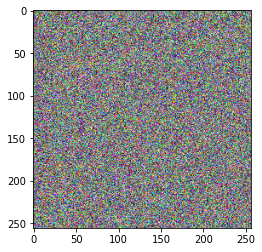

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
data = image[2]
print(data.shape)

# Transpose data to (256, 256, 3) format
data = np.transpose(data, (1, 2, 0))

# Display the data as an image
plt.imshow(data)
plt.show()